In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import collections
import numpy as np

In [2]:
df = pd.read_csv('results/sim_trace.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 15 columns):
id                796 non-null int64
type              796 non-null object
app               796 non-null int64
module            796 non-null object
message           796 non-null object
DES.src           796 non-null int64
DES.dst           796 non-null int64
TOPO.src          796 non-null int64
TOPO.dst          796 non-null int64
module.src        796 non-null object
service           796 non-null float64
time_in           796 non-null float64
time_out          796 non-null float64
time_emit         796 non-null float64
time_reception    796 non-null float64
dtypes: float64(5), int64(6), object(4)
memory usage: 93.4+ KB


In [4]:
df["time_latency"] = df["time_reception"] - df["time_emit"]
df["time_wait"] = df["time_in"] - df["time_reception"]  
df["time_service"] = df["time_out"] - df["time_in"]
df["time_response"] = df["time_out"] - df["time_reception"]
df["time_total_response"] = df["time_response"] + df["time_latency"]

In [5]:
# convert index to date type in order to use resample and agreegate functions of pandas
df["date"]=df.time_in.astype('datetime64[s]')
df.index = df.date

In [6]:
df.head()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,...,time_in,time_out,time_emit,time_reception,time_latency,time_wait,time_service,time_response,time_total_response,date
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:01:41,1,COMP_M,0,0_01,M.USER.APP.0,0,5,1,0,None,...,101.00002,101.30002,100.0,101.00002,1.00002,0.0,0.3,0.3,1.30002,1970-01-01 00:01:41
1970-01-01 00:01:41,2,COMP_M,1,1_01,M.USER.APP.1,1,6,2,0,None,...,101.00002,101.30002,100.0,101.00002,1.00002,0.0,0.3,0.3,1.30002,1970-01-01 00:01:41
1970-01-01 00:01:41,4,COMP_M,3,3_01,M.USER.APP.3,3,8,4,0,None,...,101.00002,101.30002,100.0,101.00002,1.00002,0.0,0.3,0.3,1.30002,1970-01-01 00:01:41
1970-01-01 00:01:42,3,COMP_M,2,2_01,M.USER.APP.2,2,7,3,0,None,...,102.00004,102.30004,100.0,102.00004,2.00004,0.0,0.3,0.3,2.30004,1970-01-01 00:01:42
1970-01-01 00:03:21,5,COMP_M,0,0_01,M.USER.APP.0,0,5,1,0,None,...,201.00002,201.30002,200.0,201.00002,1.00002,0.0,0.3,0.3,1.30002,1970-01-01 00:03:21


# Latency

In [7]:
df_resample = df.resample('100s').agg(dict(time_latency='mean'))

In [8]:
df_resample.shape

(199, 1)

In [9]:
timeLatency = df_resample.time_latency.values

In [10]:
ticks = range(len(timeLatency))

Text(0, 0.5, 'Latency time')

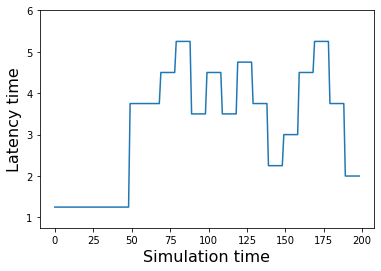

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ticks, timeLatency, '-')
ax1.set_ylim(timeLatency.min()-0.5,6)#timeLatency.max()+0.5)
ax1.set_xlabel("Simulation time", fontsize=16)
ax1.set_ylabel("Latency time", fontsize=16)

# Hop Count

In [12]:
# Hop count
cache_distance = {}

In [15]:
G = nx.read_graphml('results/graph_binomial_tree_5')

In [17]:
print(G.nodes())

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '12', '11', '13', '14', '15', '16', '17', '18', '20', '24', '19', '21', '22', '23', '25', '26', '28', '27', '29', '30', '31']


In [18]:
def compute_distance(k):
    return nx.shortest_path_length(G,str(k[0]),str(k[1]))

In [19]:
for row in df[["TOPO.src","TOPO.dst"]].iterrows():
    k = (row[1][0],row[1][1])
    if not k in cache_distance.keys():
        cache_distance[k] = compute_distance(k)

In [21]:
x = cache_distance.values() 
counter = collections.Counter(x)
print(counter)

Counter({4: 15, 3: 11, 5: 9, 2: 8, 1: 7, 6: 4})


In [23]:
data_a = {}
for k in range(8):
    data_a[k] = counter[k]

In [24]:
data_a

{0: 0, 1: 7, 2: 8, 3: 11, 4: 15, 5: 9, 6: 4, 7: 0}

In [25]:
data_a = data_a.values()

In [26]:
ticks = range(8)

In [29]:
N = len(ticks)
ind = np.array(ticks)
width = 0.45

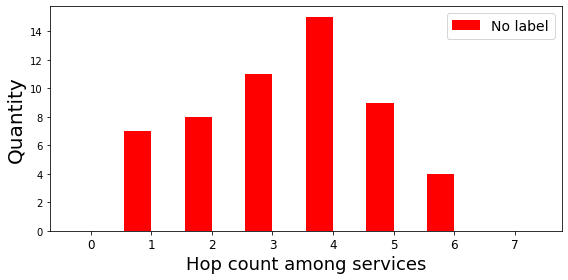

In [33]:
fig, ax = plt.subplots(figsize=(8.0,4.0))
ax.get_xaxis().set_ticks(range(0, len(ticks) * 2, 2))
r = ax.bar(ind, data_a, width, color='r')
ax.set_xticks(ind+ width/2)
ax.set_xticklabels(ticks, fontsize=12)
#ax.set_title("App")
ax.set_xlim(-width, len(ticks))
ax.plot([], c='#a6bddb', label="No LABEL",linewidth=3)
ax.set_xlabel("Hop count among services", fontsize=18)
ax.set_ylabel("Quantity", fontsize=20)
plt.legend([r],['No label'],loc="upper right",fontsize=14)
plt.tight_layout()